<a target="_blank" href="https://colab.research.google.com/github/victorlymarev/pandas/blob/main/notebooks/10-operations.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# Операции с числами и строками
#### [Ссылка на видео](https://youtu.be/km18qCeo99I)

In [1]:
import pandas as pd
import numpy as np

Создаем датафрейм

In [2]:
df = pd.DataFrame({'Колонка 1': [1, 2, 3, 4, 5, 6],
              'Колонка 2': [6, 5, 4, 3, 2, 1],
              'Колонка 3': [np.nan, 3, 5, 0, 9, 11],
              'Имя': ['Миша', 'Саша', 'Юля',
                            'Настя', 'Андрей', 'Катя'],
              'Увлечение': ['Баскетбол', 'Хоккей', 'Волейбол',
                            'Футбол', 'Counter-Strike', 'Бильярд']
             })

In [ ]:
df

# Операции с числами

| Знак   | Операция              | Метод                 |
|:-------|:----------------------|:----------------------|
| +      | Сумма                 | add                   |
| -      | Разность              | sub                   |
| *      | Умножение             | mul                   |
| /      | Деление               | div, truediv          |
| //     | Целочисленное деление | floordiv              |
| %      | Остаток от деления    | mod                   |
| **     | Возведение в степень  | pow                   |

#### Сложение колонки и числа

Выбирать колонку и присваивать ей значение вы можете как хотите

In [3]:
# Каждое значение в колонке увеличилось на 1
df['Колонка 1'] + 1

0    2
1    3
2    4
3    5
4    6
5    7
Name: Колонка 1, dtype: int64

In [4]:
df['Колонка 1'].add(1)

0    2
1    3
2    4
3    5
4    6
5    7
Name: Колонка 1, dtype: int64

#### Сложение двух колонок

In [5]:
df['Колонка 1'] + df['Колонка 2']

0    7
1    7
2    7
3    7
4    7
5    7
dtype: int64

#### Сложение колонок с пропущенными значениями

In [6]:
df['Колонка 3']

0     NaN
1     3.0
2     5.0
3     0.0
4     9.0
5    11.0
Name: Колонка 3, dtype: float64

#### Пропущенное значение всегда остается пропущенным значением

In [7]:
df['Колонка 1'] + df['Колонка 3']

0     NaN
1     5.0
2     8.0
3     4.0
4    14.0
5    17.0
dtype: float64

#### Часто за пропусками скрываются нули. Заполнить пропуски нулем или каким-то другим значением можно методом fillna(), передав в него значение, которое вы хотите положить на метсто пропусков

In [8]:
df['Колонка 1'] + df['Колонка 3'].fillna(0)

0     1.0
1     5.0
2     8.0
3     4.0
4    14.0
5    17.0
dtype: float64

Изначально в колонке есть пропуск

In [9]:
df['Колонка 3']

0     NaN
1     3.0
2     5.0
3     0.0
4     9.0
5    11.0
Name: Колонка 3, dtype: float64

Мы заполнили его нулем

In [10]:
df['Колонка 3'].fillna(0)

0     0.0
1     3.0
2     5.0
3     0.0
4     9.0
5    11.0
Name: Колонка 3, dtype: float64

#### Сопоставление колонок при сложении идет по индексам

Проэтому если вы складываете 2 разные таблицы, то проверьте, что в них совпадают индексы

In [11]:
# поменяли индексы
df['Колонка 1'].set_axis([3, 4, 5, 6, 7, 8])

3    1
4    2
5    3
6    4
7    5
8    6
Name: Колонка 1, dtype: int64

In [12]:
df['Колонка 1'].set_axis([3, 4, 5, 6, 7, 8]) + df['Колонка 2']

0    NaN
1    NaN
2    NaN
3    4.0
4    4.0
5    4.0
6    NaN
7    NaN
8    NaN
dtype: float64

По этой же причине не допускайте повторяющихся индексов при арифметических операциях

#### Вычитание

In [13]:
df['Колонка 1'] - 2
# df['Колонка 1'].sub(2)

0   -1
1    0
2    1
3    2
4    3
5    4
Name: Колонка 1, dtype: int64

In [14]:
2 - df['Колонка 1']
# df['Колонка 1'].rsub(2)

0    1
1    0
2   -1
3   -2
4   -3
5   -4
Name: Колонка 1, dtype: int64

Разность двух колонок

In [15]:
df['Колонка 1'] - df['Колонка 2']

0   -5
1   -3
2   -1
3    1
4    3
5    5
dtype: int64

#### Умножение

In [16]:
df['Колонка 1'] * 2

0     2
1     4
2     6
3     8
4    10
5    12
Name: Колонка 1, dtype: int64

In [17]:
df['Колонка 1'] * df['Колонка 2']

0     6
1    10
2    12
3    12
4    10
5     6
dtype: int64

#### Деление

In [18]:
df['Колонка 1'] / 2

0    0.5
1    1.0
2    1.5
3    2.0
4    2.5
5    3.0
Name: Колонка 1, dtype: float64

При делении на ноль получается знчение inf или NaN

In [19]:
df['Колонка 3']

0     NaN
1     3.0
2     5.0
3     0.0
4     9.0
5    11.0
Name: Колонка 3, dtype: float64

In [20]:
df['Колонка 1'] / df['Колонка 3']

0         NaN
1    0.666667
2    0.600000
3         inf
4    0.555556
5    0.545455
dtype: float64

In [21]:
(-df['Колонка 1']) / df['Колонка 3']

0         NaN
1   -0.666667
2   -0.600000
3        -inf
4   -0.555556
5   -0.545455
dtype: float64

In [22]:
(df['Колонка 1'] / df['Колонка 3']) > 1000000000000

0    False
1    False
2    False
3     True
4    False
5    False
dtype: bool

0/0

In [23]:
df['Колонка 3'] / df['Колонка 3']

0    NaN
1    1.0
2    1.0
3    NaN
4    1.0
5    1.0
Name: Колонка 3, dtype: float64

#### Целочисленное деление

5 / 2 = 2, остаток 1    
   
   
делеимое / делитель = частное и остаток от деления

In [24]:
df['Колонка 1'] // 2

0    0
1    1
2    1
3    2
4    2
5    3
Name: Колонка 1, dtype: int64

#### Остаток от деления

In [25]:
df['Колонка 1'] % 2

0    1
1    0
2    1
3    0
4    1
5    0
Name: Колонка 1, dtype: int64

#### Возведние в степень

In [26]:
df['Колонка 1'] ** 2

0     1
1     4
2     9
3    16
4    25
5    36
Name: Колонка 1, dtype: int64

In [27]:
df['Колонка 1'] ** df['Колонка 1']

0        1
1        4
2       27
3      256
4     3125
5    46656
Name: Колонка 1, dtype: int64

#### Целые числа нельзя возводить в отрицательную степень

In [28]:
df['Колонка 1'] ** - 2

ValueError: Integers to negative integer powers are not allowed.

In [29]:
df['Колонка 1'].astype(float) ** -2

0    1.000000
1    0.250000
2    0.111111
3    0.062500
4    0.040000
5    0.027778
Name: Колонка 1, dtype: float64

In [30]:
1 / df['Колонка 1'] ** 2

0    1.000000
1    0.250000
2    0.111111
3    0.062500
4    0.040000
5    0.027778
Name: Колонка 1, dtype: float64

### Арифметические операции определены стандартно, но если что-то непонятно, то лучше ставить скобки

In [31]:
((df['Колонка 1'] + df['Колонка 3']) * df['Колонка 2']) ** 0.5

0         NaN
1    5.000000
2    5.656854
3    3.464102
4    5.291503
5    4.123106
dtype: float64

In [32]:
df['Колонка 1'] / 2 * 100

0     50.0
1    100.0
2    150.0
3    200.0
4    250.0
5    300.0
Name: Колонка 1, dtype: float64

In [33]:
(df['Колонка 1'] / 2) * 100

0     50.0
1    100.0
2    150.0
3    200.0
4    250.0
5    300.0
Name: Колонка 1, dtype: float64

#### Когда мы записываем выражение в скобках мы его можем переносить между строк как угодно

In [34]:
(
df['Колонка 1']
+
df['Колонка 1']
)

0     2
1     4
2     6
3     8
4    10
5    12
Name: Колонка 1, dtype: int64

#### Если мы после выполнения арифметических операций хотим использовать какие-то другие методы, то все выражение мы должны обернуть в круглые скобки

In [35]:
(df['Колонка 1'] + df['Колонка 2'])

0    7
1    7
2    7
3    7
4    7
5    7
dtype: int64

In [36]:
(df['Колонка 1'] + df['Колонка 2']).sample(10, replace=True, random_state=9)

4    7
5    7
0    7
3    7
5    7
1    7
4    7
3    7
0    7
2    7
dtype: int64

Иначе метод sample будет применен только к первому датафрейму

In [37]:
df['Колонка 1'] + df['Колонка 2'].sample(10, replace=True, random_state=9)

0    7
0    7
1    7
2    7
3    7
3    7
4    7
4    7
5    7
5    7
dtype: int64

# Операции со строками

In [38]:
df['Имя']

0      Миша
1      Саша
2       Юля
3     Настя
4    Андрей
5      Катя
Name: Имя, dtype: object

#### Умножение на целое число

In [39]:
df['Имя'] * 3

0          МишаМишаМиша
1          СашаСашаСаша
2             ЮляЮляЮля
3       НастяНастяНастя
4    АндрейАндрейАндрей
5          КатяКатяКатя
Name: Имя, dtype: object

#### Сложение двух строк

In [40]:
df['Имя'] + ' хороший человек'

0      Миша хороший человек
1      Саша хороший человек
2       Юля хороший человек
3     Настя хороший человек
4    Андрей хороший человек
5      Катя хороший человек
Name: Имя, dtype: object

In [41]:
df['Имя'] + df['Увлечение']

0           МишаБаскетбол
1              СашаХоккей
2             ЮляВолейбол
3             НастяФутбол
4    АндрейCounter-Strike
5             КатяБильярд
dtype: object

In [42]:
df['Имя'] + ' любит ' + df['Увлечение']

0           Миша любит Баскетбол
1              Саша любит Хоккей
2             Юля любит Волейбол
3             Настя любит Футбол
4    Андрей любит Counter-Strike
5             Катя любит Бильярд
dtype: object

# Операции с датафреймами

Если операция определена для всех колонок датафрейма, то она может быть применена

In [43]:
df * 2

,Колонка 1,Колонка 2,Колонка 3,Имя,Увлечение
0,2,12,NaN,МишаМиша,БаскетболБаскетбол
1,4,10,6.0,СашаСаша,ХоккейХоккей
2,6,8,10.0,ЮляЮля,ВолейболВолейбол
3,8,6,0.0,НастяНастя,ФутболФутбол
4,10,4,18.0,АндрейАндрей,Counter-StrikeCounter-Strike
5,12,2,22.0,КатяКатя,БильярдБильярд


In [44]:
df + df + df

,Колонка 1,Колонка 2,Колонка 3,Имя,Увлечение
0,3,18,NaN,МишаМишаМиша,БаскетболБаскетболБаскетбол
1,6,15,9.0,СашаСашаСаша,ХоккейХоккейХоккей
2,9,12,15.0,ЮляЮляЮля,ВолейболВолейболВолейбол
3,12,9,0.0,НастяНастяНастя,ФутболФутболФутбол
4,15,6,27.0,АндрейАндрейАндрей,Counter-StrikeCounter-StrikeCounter-Strike
5,18,3,33.0,КатяКатяКатя,БильярдБильярдБильярд


In [103]:
df.iloc[:, :2]

,Колонка 1,Колонка 2
0,1,6
1,2,5
2,3,4
3,4,3
4,5,2
5,6,1


In [104]:
df.iloc[:, :3] + 1

,Колонка 1,Колонка 2,Колонка 3
0,2,7,NaN
1,3,6,4.0
2,4,5,6.0
3,5,4,1.0
4,6,3,10.0
5,7,2,12.0


In [47]:
df.iloc[:, :3] * 2

,Колонка 1,Колонка 2,Колонка 3
0,2,12,NaN
1,4,10,6.0
2,6,8,10.0
3,8,6,0.0
4,10,4,18.0
5,12,2,22.0


In [48]:
df.iloc[:, :3] ** 2

,Колонка 1,Колонка 2,Колонка 3
0,1,36,NaN
1,4,25,9.0
2,9,16,25.0
3,16,9,0.0
4,25,4,81.0
5,36,1,121.0


#### Сложение со списком идет построчно

In [49]:
df.iloc[:, :3] + [100, 10000, 1000000]

,Колонка 1,Колонка 2,Колонка 3
0,101,10006,NaN
1,102,10005,1000003.0
2,103,10004,1000005.0
3,104,10003,1000000.0
4,105,10002,1000009.0
5,106,10001,1000011.0


Поэтому просто так колонку к датафрему прибавить не получится

In [50]:
df.iloc[:, :3] + df['Колонка 1']

,Колонка 1,Колонка 2,Колонка 3,0,1,2,3,4,5
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [51]:
df['Колонка 1'].to_numpy().reshape(-1, 1)

array([[1],
       [2],
       [3],
       [4],
       [5],
       [6]])

In [52]:
df.iloc[:, :3] + df['Колонка 1'].to_numpy().reshape(-1, 1)

,Колонка 1,Колонка 2,Колонка 3
0,2,7,NaN
1,4,7,5.0
2,6,7,8.0
3,8,7,4.0
4,10,7,14.0
5,12,7,17.0


# Операции с векторами и матрицами

Создаем 2 матрицы и вектор

In [53]:
np.random.seed(32)
matrix_1 = np.arange(24).reshape(6, -1)
matrix_1

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22, 23]])

In [109]:
np.ones(28).reshape(7, -1)

array([[1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.]])

In [111]:
np.eye(8)

array([[1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1.]])

In [54]:
np.random.seed(32)
matrix_2 = np.random.randint(10, size=(4, 6))
matrix_2

array([[7, 5, 6, 8, 3, 7],
       [9, 3, 5, 9, 4, 1],
       [3, 1, 2, 3, 8, 2],
       [4, 2, 4, 4, 9, 5]])

In [55]:
vector = np.arange(4)
vector

array([0, 1, 2, 3])

Все операции определены так же, как и у DataFrame и Series

In [56]:
matrix_1 * 2

array([[ 0,  2,  4,  6],
       [ 8, 10, 12, 14],
       [16, 18, 20, 22],
       [24, 26, 28, 30],
       [32, 34, 36, 38],
       [40, 42, 44, 46]])

In [57]:
vector + 10

array([10, 11, 12, 13])

In [58]:
matrix_1 + matrix_2.T

array([[ 7, 10,  5,  7],
       [ 9,  8,  7,  9],
       [14, 14, 12, 15],
       [20, 22, 17, 19],
       [19, 21, 26, 28],
       [27, 22, 24, 28]])

In [59]:
matrix_1 + vector

array([[ 0,  2,  4,  6],
       [ 4,  6,  8, 10],
       [ 8, 10, 12, 14],
       [12, 14, 16, 18],
       [16, 18, 20, 22],
       [20, 22, 24, 26]])

In [60]:
matrix_2 + vector.reshape(-1, 1)

array([[ 7,  5,  6,  8,  3,  7],
       [10,  4,  6, 10,  5,  2],
       [ 5,  3,  4,  5, 10,  4],
       [ 7,  5,  7,  7, 12,  8]])

In [61]:
(matrix_2.T + vector).T

array([[ 7,  5,  6,  8,  3,  7],
       [10,  4,  6, 10,  5,  2],
       [ 5,  3,  4,  5, 10,  4],
       [ 7,  5,  7,  7, 12,  8]])

### Скалярное произведение

In [62]:
vector @ np.arange(5, 9)

44

In [112]:
np.arange(5, 9)

array([5, 6, 7, 8])

In [63]:
print(vector)
print(np.arange(5, 9))
print('---------')
print(vector * np.arange(5, 9))
print((vector * np.arange(5, 9)).sum())

[0 1 2 3]
[5 6 7 8]
---------
[ 0  6 14 24]
44


#### Матричное умнжение

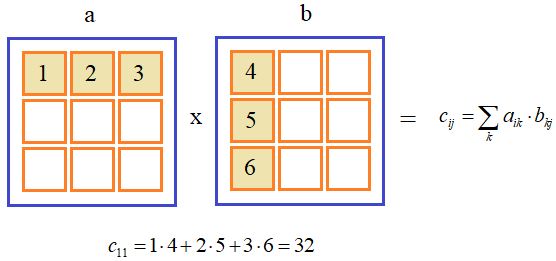

In [64]:
matrix_1 @ matrix_2

array([[ 27,  11,  21,  27,  47,  20],
       [119,  55,  89, 123, 143,  80],
       [211,  99, 157, 219, 239, 140],
       [303, 143, 225, 315, 335, 200],
       [395, 187, 293, 411, 431, 260],
       [487, 231, 361, 507, 527, 320]])

In [65]:
matrix_1

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22, 23]])

In [66]:
matrix_2

array([[7, 5, 6, 8, 3, 7],
       [9, 3, 5, 9, 4, 1],
       [3, 1, 2, 3, 8, 2],
       [4, 2, 4, 4, 9, 5]])

In [67]:
matrix_2 @ matrix_1

array([[352, 388, 424, 460],
       [244, 275, 306, 337],
       [224, 243, 262, 281],
       [332, 360, 388, 416]])

In [68]:
matrix_1.dot(matrix_2)

array([[ 27,  11,  21,  27,  47,  20],
       [119,  55,  89, 123, 143,  80],
       [211,  99, 157, 219, 239, 140],
       [303, 143, 225, 315, 335, 200],
       [395, 187, 293, 411, 431, 260],
       [487, 231, 361, 507, 527, 320]])

### Операциями с векторами разных размеров

In [69]:
vector_1 = np.arange(1, 10).reshape(-1, 1)
vector_1

array([[1],
       [2],
       [3],
       [4],
       [5],
       [6],
       [7],
       [8],
       [9]])

In [70]:
vector_2 = np.arange(1, 7)
vector_2

array([1, 2, 3, 4, 5, 6])

In [71]:
vector_1 * vector_2

array([[ 1,  2,  3,  4,  5,  6],
       [ 2,  4,  6,  8, 10, 12],
       [ 3,  6,  9, 12, 15, 18],
       [ 4,  8, 12, 16, 20, 24],
       [ 5, 10, 15, 20, 25, 30],
       [ 6, 12, 18, 24, 30, 36],
       [ 7, 14, 21, 28, 35, 42],
       [ 8, 16, 24, 32, 40, 48],
       [ 9, 18, 27, 36, 45, 54]])

In [72]:
vector_1 @ vector_2.reshape(1, -1)

array([[ 1,  2,  3,  4,  5,  6],
       [ 2,  4,  6,  8, 10, 12],
       [ 3,  6,  9, 12, 15, 18],
       [ 4,  8, 12, 16, 20, 24],
       [ 5, 10, 15, 20, 25, 30],
       [ 6, 12, 18, 24, 30, 36],
       [ 7, 14, 21, 28, 35, 42],
       [ 8, 16, 24, 32, 40, 48],
       [ 9, 18, 27, 36, 45, 54]])

In [73]:
vector_1 @ vector_2[None, ...]

array([[ 1,  2,  3,  4,  5,  6],
       [ 2,  4,  6,  8, 10, 12],
       [ 3,  6,  9, 12, 15, 18],
       [ 4,  8, 12, 16, 20, 24],
       [ 5, 10, 15, 20, 25, 30],
       [ 6, 12, 18, 24, 30, 36],
       [ 7, 14, 21, 28, 35, 42],
       [ 8, 16, 24, 32, 40, 48],
       [ 9, 18, 27, 36, 45, 54]])

### Многомерные операции

In [115]:
np.random.seed(42)
tenzor = np.random.randint(10, size=(2, 5, 4))
np.random.seed(4223)
matrix = np.random.randint(10, size=(4, 5))
tenzor

array([[[6, 3, 7, 4],
        [6, 9, 2, 6],
        [7, 4, 3, 7],
        [7, 2, 5, 4],
        [1, 7, 5, 1]],

       [[4, 0, 9, 5],
        [8, 0, 9, 2],
        [6, 3, 8, 2],
        [4, 2, 6, 4],
        [8, 6, 1, 3]]])

In [75]:
matrix

array([[3, 7, 2, 0],
       [2, 4, 3, 3],
       [8, 0, 2, 5],
       [1, 8, 4, 8]])

In [76]:
tenzor.shape

(2, 4, 4)

In [77]:
tenzor[0]

array([[6, 3, 7, 4],
       [6, 9, 2, 6],
       [7, 4, 3, 7],
       [7, 2, 5, 4]])

In [78]:
tenzor[1]

array([[1, 7, 5, 1],
       [4, 0, 9, 5],
       [8, 0, 9, 2],
       [6, 3, 8, 2]])

In [116]:
matrix @ tenzor

array([[[ 76,  94,  51,  70],
        [119,  67,  83,  87],
        [109,  99,  87,  81],
        [157, 160, 153, 123]],

       [[ 96,  18, 108,  39],
        [ 90,  25, 135,  64],
        [118,  43, 123,  66],
        [192,  78, 194, 109]]])

In [80]:
matrix @ tenzor[0]

array([[ 74,  80,  41,  68],
       [ 78,  60,  46,  65],
       [ 97,  42,  87,  66],
       [138, 107,  75, 112]])

In [81]:
matrix @ tenzor[1]

array([[ 47,  21,  96,  42],
       [ 60,  23,  97,  34],
       [ 54,  71,  98,  22],
       [113,  31, 177,  65]])

In [82]:
tenzor @ tenzor

array([[[131,  81,  89, 107],
        [146, 119,  96, 116],
        [136,  83, 101, 101],
        [117,  67,  88,  91]],

       [[ 75,  10, 121,  48],
        [106,  43, 141,  32],
        [ 92,  62, 137,  30],
        [ 94,  48, 145,  41]]])

In [83]:
tenzor[0] @ tenzor[0]

array([[131,  81,  89, 107],
       [146, 119,  96, 116],
       [136,  83, 101, 101],
       [117,  67,  88,  91]])

Это работает не только с матричным умножением, но и с другими операциями

In [84]:
tenzor * tenzor[0]

array([[[36,  9, 49, 16],
        [36, 81,  4, 36],
        [49, 16,  9, 49],
        [49,  4, 25, 16]],

       [[ 6, 21, 35,  4],
        [24,  0, 18, 30],
        [56,  0, 27, 14],
        [42,  6, 40,  8]]])

# Задания

#### Описание таблиц лежит [здесь](https://github.com/victorlymarev/pandas/tree/main/tables#%D0%BE%D0%BF%D0%B8%D1%81%D0%B0%D0%BD%D0%B8%D0%B5-%D1%82%D0%B0%D0%B1%D0%BB%D0%B8%D1%86)

Некоторые таблицы занимают много памяти, поэтому каждые 5-10 заданий лучше перезапускайте ноутбук.

В формулировке некоторых заданий может содержаться вариативность. Если у вас есть сомнения, что требуется в задании, попробуйте решить несколько вариантов. Если вы не понимаете задание, можете написать об этом в комментариях под видео.

В большинстве случаев внешний вид итоговой таблицы не определен. Выведите на экран наиболее адекватный вариант. То есть таблицу, из которой можно будет сделать выводы.

Курс пока находится в разработке. Вы можете помочь другим людям добавив свое решение [сюда](https://docs.google.com/forms/d/1HYTBz_KfssY3Jps2dC3n0YnEqa6WBb5OIhLo1d32Xzw/edit).

Посмотреть решения других людей можно [здесь](https://docs.google.com/spreadsheets/d/1pMDYO-9UneLbPPnEuQ2shig0TOJdQTU-zipifyAnZMk/edit?resourcekey#gid=1998648012)

### Задание 1

Перемножьте колонки price (цена) и goods_number (количество товара в чеке). Назавите колонку sum_price

In [85]:
# таблица sales - большая, и в некоторых случаях ваш компьютер может не справиться с ее обработкой
# поэтому лучше работайте с частью этой таблицы
# но если вы хотите попробовать поработать с полной версией таблицы,
# можете заменить переменную path_sales_2022 на path_sales внутри функции read_parquet

import os
import pandas as pd

path_sales_2022 = '../tables/sales_2022.parquet' if os.path.exists('../tables/sales_2022.parquet') else 'https://drive.google.com/uc?id=17e7FwXVdsWc2aziK9s5KidIvPcfKt9F5'
# path_sales = '../tables/sales.parquet' if os.path.exists('../tables/sales.parquet') else "https://drive.usercontent.google.com/download?id=15KwSxyM6hpNABGe6_vsrFZvD09VfHFyK&export=download&authuser=1&confirm=t&uuid=115bd48c-cc2c-4f2a-8b42-be5ca6ef6db8&at=APZUnTUVb8nfNANw5wr9Cad7PJ3U:1693327774694"

sales = pd.read_parquet(path_sales_2022)
sales.head()

,check_id,customer_id,purchase_date,shop_id,product_code_1,product_code_2,product_code_3,cashier,shop_assistant,price,goods_number
0,5018720,397529,2022-01-01 10:00:10,23,5296,203797948,203797952,1400,1261,1199.9,1
1,5018720,397529,2022-01-01 10:00:10,23,3469,204154277,204154280,1400,1261,2299.9,1
2,5018721,398014,2022-01-01 10:00:12,22,7195,203131402,203131442,1421,1224,4720.0,1
3,5018721,398014,2022-01-01 10:00:12,22,7195,203131375,203131509,1421,1224,5899.9,1
4,5018722,118702,2022-01-01 10:00:41,8,6227,203635921,203635948,298,1462,8999.9,1


In [117]:
sales['price'] * sales['goods_number']

0          1199.9
1          2299.9
2          4720.0
3          5899.9
4          8999.9
            ...  
2435792    2999.9
2435793    1995.0
2435794    2880.0
2435795    3600.0
2435796    1499.9
Length: 2435797, dtype: float64

### Задание 2

Посчитайте заработную плату после вычета налога в 13%

In [87]:
import os
import pandas as pd

path_empl = '../tables/employees.parquet' if os.path.exists('../tables/employees.parquet') else 'https://drive.google.com/uc?id=1AARD5-eVlCxoApt5CYZebrC3Cqw42lvj'

empl = pd.read_parquet(path_empl)
empl.head()

,report_dt,i_pernr,fio,sex,shop_id,pos_name,pos_id,closest_boss_pos_id,mgmt_flag,salary_fork,birth_date,education,employee_evaluation,salary
0,2015-01-31,100000,Кожевников Андрей Максимович,мужской,1,Директор магазина,11,<NA>,1,0,1987-03-11,высшее,5.0,45700.0
1,2015-01-31,0,Дубинина Надежда Николаевна,женский,1,Старший кассир,12,11,0,0,1971-07-07,среднее профессиональное,5.0,20000.0
2,2015-01-31,1,Вишневскиая Валентина Константиновна,женский,1,Кассир,13,12,0,0,1974-11-29,среднее общее,5.0,12600.0
3,2015-01-31,2,Литвинов Александр Максимович,мужской,1,Кассир,14,12,0,0,1969-11-01,среднее общее,3.0,12600.0
4,2015-01-31,3,Черняева Валерия Глебовна,женский,1,Продавец-консультант,17,11,0,0,1988-07-17,среднее общее,NaN,15400.0


In [119]:
empl['salary'] * 0.87

0        39759.0
1        17400.0
2        10962.0
3        10962.0
4        13398.0
          ...   
29367    33060.0
29368    27666.0
29369    24708.0
29370    30885.0
29371    22968.0
Name: salary, Length: 29372, dtype: float64

### Задание 3

Посчитайте размер премии. Для этого создайте новую колонку bonus.

Премия выплачивается 31 декабря каждого года. В остальные месяцы премия равна нулю.
Для управляющего персонала (mgmt == 1), она равна двум заработным платам, а для всех остальных сотрудников она равна зарплате,
умноженной на оценку сотрудника и деленную на 5. Если оценка сотрудника пропущена. Заполните это значение числом 5.

In [89]:
import os
import pandas as pd

path_empl = '../tables/employees.parquet' if os.path.exists('../tables/employees.parquet') else 'https://drive.google.com/uc?id=1AARD5-eVlCxoApt5CYZebrC3Cqw42lvj'

empl = pd.read_parquet(path_empl)
empl.head()

,report_dt,i_pernr,fio,sex,shop_id,pos_name,pos_id,closest_boss_pos_id,mgmt_flag,salary_fork,birth_date,education,employee_evaluation,salary
0,2015-01-31,100000,Кожевников Андрей Максимович,мужской,1,Директор магазина,11,<NA>,1,0,1987-03-11,высшее,5.0,45700.0
1,2015-01-31,0,Дубинина Надежда Николаевна,женский,1,Старший кассир,12,11,0,0,1971-07-07,среднее профессиональное,5.0,20000.0
2,2015-01-31,1,Вишневскиая Валентина Константиновна,женский,1,Кассир,13,12,0,0,1974-11-29,среднее общее,5.0,12600.0
3,2015-01-31,2,Литвинов Александр Максимович,мужской,1,Кассир,14,12,0,0,1969-11-01,среднее общее,3.0,12600.0
4,2015-01-31,3,Черняева Валерия Глебовна,женский,1,Продавец-консультант,17,11,0,0,1988-07-17,среднее общее,NaN,15400.0


In [122]:
empl["bonus"] = np.where(
    empl["report_dt"].dt.month == 12,  # Проверяем, декабрь ли
    np.where(
        empl["mgmt_flag"] == 1,  # Проверяем, управляющий ли
        empl["salary"] * 2,  # Премия для управляющего
        empl["salary"]
        * (empl["employee_evaluation"].fillna(5))
        / 5,  # Премия для остальных
    ),
    0,  # В остальные месяцы премия равна 0
)
empl

,report_dt,i_pernr,fio,sex,shop_id,pos_name,pos_id,closest_boss_pos_id,mgmt_flag,salary_fork,birth_date,education,employee_evaluation,salary,bonus
0,2015-01-31,100000,Кожевников Андрей Максимович,мужской,1,Директор магазина,11,<NA>,1,0,1987-03-11,высшее,5.0,45700.0,0.0
1,2015-01-31,0,Дубинина Надежда Николаевна,женский,1,Старший кассир,12,11,0,0,1971-07-07,среднее профессиональное,5.0,20000.0,0.0
2,2015-01-31,1,Вишневскиая Валентина Константиновна,женский,1,Кассир,13,12,0,0,1974-11-29,среднее общее,5.0,12600.0,0.0
3,2015-01-31,2,Литвинов Александр Максимович,мужской,1,Кассир,14,12,0,0,1969-11-01,среднее общее,3.0,12600.0,0.0
4,2015-01-31,3,Черняева Валерия Глебовна,женский,1,Продавец-консультант,17,11,0,0,1988-07-17,среднее общее,NaN,15400.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29367,2022-12-31,1372,Морозова Раиса Ярославовна,женский,23,Продавец-консультант,2325,232,0,2,1962-01-13,среднее профессиональное,6.0,38000.0,45600.0
29368,2022-12-31,1615,Фадеева Евгения Данииловна,женский,23,Товаровед,2326,233,0,1,1989-07-12,среднее общее,6.0,31800.0,38160.0
29369,2022-12-31,1748,Измайлов Григорий Артемович,мужской,23,Товаровед,2327,233,0,0,1989-12-23,среднее общее,3.0,28400.0,17040.0
29370,2022-12-31,1616,Русаков Евгений Тимурович,мужской,23,Мастер по ремонту одежды,2328,232,0,2,1963-09-19,среднее профессиональное,7.0,35500.0,49700.0


### Задание 4

Соедините колонки city и adress в одну.

Пример того, как должна выглядить колонка: г. Воронеж, Пушкинская пл., д. 76

In [126]:
import os
import pandas as pd

path_shops = '../tables/shops.xlsx' if os.path.exists('../tables/shops.xlsx') else 'https://drive.google.com/uc?id=1gfnmceJa3Mc1X06NftTx9G9QfKfprjEB'

shops = pd.read_excel(path_shops)
shops.head()

,shop_id,city,adress,shopping_center,size,open_date
0,1,Воронеж,"Пушкинская пл., д. 76",NaN,Мелкий,2015-01-22
1,2,Санкт-Петербург,"ул. Веселая, д. 20",Книга,Крупный,2015-05-11
2,3,Чита,"Тупой пер., д. 1",NaN,Мелкий,2015-11-27
3,4,Липецк,"пр. Гагарина, д. 234",Обезьяна,Средний,2016-04-04
4,5,Челябинск,"пр. Железнодорожников, д. 12",NaN,Мелкий,2016-04-11


In [128]:
shops['city + adress'] = shops['city'] +', ' + shops['adress']
shops

,shop_id,city,adress,shopping_center,size,open_date,city + adress
0,1,Воронеж,"Пушкинская пл., д. 76",NaN,Мелкий,2015-01-22,"Воронеж, Пушкинская пл., д. 76"
1,2,Санкт-Петербург,"ул. Веселая, д. 20",Книга,Крупный,2015-05-11,"Санкт-Петербург, ул. Веселая, д. 20"
2,3,Чита,"Тупой пер., д. 1",NaN,Мелкий,2015-11-27,"Чита, Тупой пер., д. 1"
3,4,Липецк,"пр. Гагарина, д. 234",Обезьяна,Средний,2016-04-04,"Липецк, пр. Гагарина, д. 234"
4,5,Челябинск,"пр. Железнодорожников, д. 12",NaN,Мелкий,2016-04-11,"Челябинск, пр. Железнодорожников, д. 12"
5,6,Казань,"ул. Кривая, д. 5",Фараон,Крупный,2016-04-19,"Казань, ул. Кривая, д. 5"
6,7,Екатеринбург,"ул. Каспийская, д. 90",Ворона,Крупный,2017-01-17,"Екатеринбург, ул. Каспийская, д. 90"
7,8,Якутск,"ул. Оружейная, д. 100",Спорт,Средний,2017-02-08,"Якутск, ул. Оружейная, д. 100"
8,9,Саратов,"ул. Солнечная, д. 189",Сокол,Средний,2017-05-10,"Саратов, ул. Солнечная, д. 189"
9,10,Кемерово,"ул. Улиточная, д. 8",Калейдоскоп,Средний,2017-08-13,"Кемерово, ул. Улиточная, д. 8"


### Задание 5

Для каждого школьника создайте 3 поля: первое поле должно содержать информацию о том, что у школьника по какому-то из предметов есть тройка, второе поле, что есть четверка и третье, что есть пятерка. Закодируйет эту информацию в один столбец

Способ кодировки можете выбрать сами. Например, 1 может значить, что у человека выполнено 1 условие, а два других нет, 2 - у человека выполено 2 условие а все остальные нет, 3 - у человека выполено 3 условие а все остальные нет, 4 - у человека выполнено перовое и второе условие, а третье нет и так далее

In [93]:
import os
import pandas as pd

path_marks = '../tables/школьные оценки.xlsx' if os.path.exists('../tables/школьные оценки.xlsx') else 'https://drive.google.com/uc?id=1v9kRv1I03CXtQ6vFE4mE3hFAty436qAo'
marks = pd.read_excel(path_marks)
marks.head()

,ФИО,Пол,Математика,Русский язык,Литература,Физика,История,Физическая культура
0,Суханова Маргарита Богдановна,женский,3,3,3,3,3,5
1,Лаврентьев Давид Анатольевич,мужской,3,3,3,5,3,3
2,Винниченко Дарья Максимовна,женский,4,5,5,3,4,5
3,Козлова Маргарита Максимовна,женский,5,5,5,5,4,5
4,Кулешов Евгений Маратович,мужской,3,3,4,3,4,3


In [129]:
def encode_grades(row):
    has_three = int((row[["Русский язык", "Математика", "История"]] == 3).any())
    has_four = int((row[["Русский язык", "Математика", "История"]] == 4).any())
    has_five = int((row[["Русский язык", "Математика", "История"]] == 5).any())

    # Кодируем в одно число
    code = has_three + 2 * has_four + 3 * has_five
    return code
marks["Код оценок"] = marks.apply(encode_grades, axis=1)
marks

,ФИО,Пол,Математика,Русский язык,Литература,Физика,История,Физическая культура,Код оценок
0,Суханова Маргарита Богдановна,женский,3,3,3,3,3,5,1
1,Лаврентьев Давид Анатольевич,мужской,3,3,3,5,3,3,1
2,Винниченко Дарья Максимовна,женский,4,5,5,3,4,5,5
3,Козлова Маргарита Максимовна,женский,5,5,5,5,4,5,5
4,Кулешов Евгений Маратович,мужской,3,3,4,3,4,3,3
...,...,...,...,...,...,...,...,...,...
140,Бычкова Александра Борисовна,женский,5,4,3,5,3,5,6
141,Кулешов Семен Богданович,мужской,4,4,4,4,4,4,2
142,Павловскиая Алена Данииловна,женский,3,4,5,4,3,5,3
143,Лапин Юрий Тимурович,мужской,4,4,4,5,3,5,3


### Задание 6

Мы знаем оценки по разным предметам, но не по геграфии. Оценку по ней уще не поставили. Однако у нас есть модель, которая предсказывает вероятность того, что школьник получит оценки 3, 4 и 5.

Посчитайте ожидаемую оценку для каждого школьника (взвесте оценки по вероятности). Для этого колонку 3 умножьте на 3, затем прибавьте к ней колонку 4, уноженную на 4, и колонку 5, умноженную на 5. 

In [95]:
import os
import numpy as np
import pandas as pd

path_marks = '../tables/школьные оценки.xlsx' if os.path.exists('../tables/школьные оценки.xlsx') else 'https://drive.google.com/uc?id=1v9kRv1I03CXtQ6vFE4mE3hFAty436qAo'
marks = pd.read_excel(path_marks)
p = np.random.rand(len(marks) * 3).reshape(-1, 3)
p = p / p.sum(1).reshape(-1, 1)

np.random.seed(243)
probs = marks[['ФИО', 'Пол']].join(pd.DataFrame(p, columns=[3, 4, 5]))
probs.head()

,ФИО,Пол,3,4,5
0,Суханова Маргарита Богдановна,женский,0.209266,0.287248,0.503485
1,Лаврентьев Давид Анатольевич,мужской,0.142705,0.368242,0.489053
2,Винниченко Дарья Максимовна,женский,0.280271,0.103994,0.615735
3,Козлова Маргарита Максимовна,женский,0.230887,0.354259,0.414854
4,Кулешов Евгений Маратович,мужской,0.817502,0.018838,0.163660


In [135]:
probs["Ожидаемая оценка"] = (
    probs[3] * 3 + probs[4] * 4 + probs[5] * 5
).round(2)
probs

,ФИО,Пол,3,4,5,Ожидаемая оценка
0,Суханова Маргарита Богдановна,женский,0.209266,0.287248,0.503485,4.29
1,Лаврентьев Давид Анатольевич,мужской,0.142705,0.368242,0.489053,4.35
2,Винниченко Дарья Максимовна,женский,0.280271,0.103994,0.615735,4.34
3,Козлова Маргарита Максимовна,женский,0.230887,0.354259,0.414854,4.18
4,Кулешов Евгений Маратович,мужской,0.817502,0.018838,0.163660,3.35
...,...,...,...,...,...,...
140,Бычкова Александра Борисовна,женский,0.178054,0.312609,0.509337,4.33
141,Кулешов Семен Богданович,мужской,0.441753,0.359838,0.198409,3.76
142,Павловскиая Алена Данииловна,женский,0.512838,0.235179,0.251983,3.74
143,Лапин Юрий Тимурович,мужской,0.242028,0.421481,0.336491,4.09


### Задание 6

В ячейке ниже создается 2 матрицы. Посмотрите их на их размерность при помощи атрибута shape. После этого попробуйте их перемножить: сначала поэлементно, а затем матрично. Однако во втором случае одну из матриц придется транспонировать. Посчитайете 4 варианта: x<sup>T</sup>y, y<sup>T</sup>x, xy<sup>T</sup>, y<sup>T</sup>x

In [143]:
import numpy as np
np.random.seed(455432)
x, y = np.random.normal(0, 1, size=(2, 3, 50))

In [140]:
x[0]

array([ 0.67005889, -0.47523798,  1.15402887, -0.23064434,  0.97681028,
        0.83235891, -0.05335325,  0.66847609, -1.08656973,  1.43284624,
        2.42492664, -0.0530845 ,  0.26519069,  0.46452006, -2.61734647,
       -1.69222737,  0.45558357,  2.71777093, -1.06915364, -0.03580024,
       -1.13283498, -1.21889605, -2.0303285 ,  0.0285556 , -0.95940151,
       -0.7103862 ,  1.0393147 ,  0.85854218, -1.34287665, -0.20192687,
        2.02903579, -1.34944033, -1.11392816, -1.0983752 ,  0.42586373,
        0.55580742, -0.8427608 , -0.41336064, -0.79489284,  0.80376341,
       -1.56561324, -2.01206512,  1.6387769 ,  1.55237262, -1.13691154,
        0.16752373, -0.83325237, -0.70997368,  0.15833985, -1.32564509])

In [138]:
print(x.shape)
print(y.shape)

(3, 50)
(3, 50)


In [141]:
y.reshape(50, -1)

array([[ 0.92013595,  0.24852844,  0.99370831],
       [-0.87506763, -0.45350057, -1.93892235],
       [-1.23396094, -1.19812472, -0.85259458],
       [-1.19388821,  0.24257304,  0.54574877],
       [ 0.48547136,  1.92101423, -0.52325437],
       [-1.07466219,  0.84201378,  1.41155217],
       [-0.11746979,  2.24723968,  0.10623915],
       [ 0.07903402, -0.4437366 ,  0.56154709],
       [ 0.22863722, -1.29006138, -0.93444068],
       [ 0.27507824,  0.30242999,  0.30284488],
       [-0.77657171, -0.9545723 ,  0.23474426],
       [ 0.47198641, -0.16838226, -0.32101021],
       [ 0.29823181, -0.5891845 , -0.09213011],
       [-1.42436863,  1.16591764,  0.9002252 ],
       [-0.34007765, -1.09462903,  1.07368899],
       [-1.33341043, -0.21510653,  0.16365451],
       [ 0.16470949,  0.18196254,  0.54239007],
       [-1.37795923, -0.75897777, -2.07657159],
       [-1.36482819, -1.00035714,  0.76822651],
       [ 0.05393209, -0.04939023, -0.26297978],
       [-0.17695996, -0.22776035,  0.361

In [145]:
x * y

array([[ 6.16545278e-01, -1.18110151e-01,  1.14676807e+00,
         2.01829394e-01, -4.42984024e-01, -1.61387929e+00,
         6.58358242e-02, -8.00917727e-01,  9.26403461e-01,
        -1.71065824e+00,  5.88221840e-01, -2.89708023e-02,
         1.28742487e-01,  8.92349653e-01,  1.36953798e+00,
         1.81857277e+00,  3.83607646e-01,  3.83627545e+00,
         1.25593253e-01, -8.04517281e-02, -1.20351421e-01,
        -9.63342555e-02,  9.00931070e-01,  1.60353148e-02,
        -2.19354896e-01,  9.16441803e-01, -9.71177936e-01,
         2.36166275e-01, -4.06126173e-01, -6.11525175e-02,
        -1.57569178e+00,  1.28813835e+00, -2.61488244e-01,
        -5.18418170e-01, -7.17078958e-02, -1.78419856e-01,
        -2.51338073e-01,  2.43545682e-01,  7.32335608e-02,
        -1.14485539e+00, -1.82537610e+00, -1.81131173e+00,
        -5.57311403e-01, -1.69927214e+00, -1.22068941e+00,
        -2.23377886e-01,  1.79238029e-01, -1.16190396e-01,
         2.60800758e-02, -2.41217747e-01],
       [ 2.13

In [149]:
x @ y.T

array([[-2.3870421 ,  9.34664715, 11.91593582],
       [-3.01600682,  5.8120946 ,  3.79875307],
       [ 0.9177062 , -1.43729562, 11.93777875]])

### Задание 7

Создайте 2 вектора одинакового размера и найдите между ними скалярное произведение

In [99]:
import numpy as np

In [160]:
vec1 = np.random.randint(1, 50, size=15)
vec1

array([31, 39, 38,  4,  8, 35, 32, 39, 19,  7, 35, 30,  4,  2, 10])

In [162]:
vec2 = np.random.randint(1, 50, size=15)
vec2

array([ 1, 23, 26, 47, 20, 43, 31,  9, 11,  9, 11, 43, 41,  5, 41])

In [163]:
vec1 @ vec2

7643